# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluate-the-whole-network-with-different-communities-by-changing-community-detection-parameters'>1. Evaluate whole network with different communities</a>
### <a href='#Evaluation-1:-how-do-#-genes-change-in-each-community-when-community-assingment-changes?'>1.1 How do # genes change in each community?</a>
### <a href='#Evaluation-2:-how-do-%-of-significant-genes-change-when-community-assingment-changes-(This-process-takes->10-min-to-run)'>1.2 How do significant gene % change with different community assignment</a>
### <a href='#Evaluation-3:-how-do-trait-and-community-correlation-change-when-community-assingment-change'>1.3 How do trait and community correlation change with different community assignment</a>
## <a href='#Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing with to the whole network</a>
### <a href='#Evaluation-1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
### <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>2.3 Compare communities of the subnetwork</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import netcomp
from itertools import combinations
from sklearn.metrics import normalized_mutual_info_score as nmi
from matplotlib import gridspec
from functions.eda_functions import *
from functions.subset_network import subset_network
from functions.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tom_df = pd.read_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\Kapoor_TOM.csv', index_col = 0)
# tom_df = pd.read_csv('/Volumes/GoogleDrive/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

# Evaluate the whole network with different communities by changing community detection parameters

In [174]:
# test with 2 sets of parameters (change resolution only)
comm_df1 = run_louvain(tom_df, 1, -1) # default setting
comm_df2 = run_louvain(tom_df, 1, 1)

In [30]:
comm_df1.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\network_louvain_default.csv', index = 0)

## Evaluation 1: how do # genes change in each community when community assingment changes?

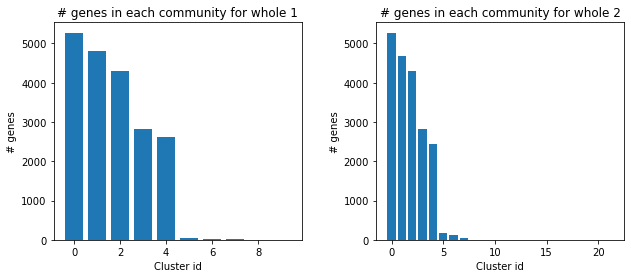

In [237]:
plot_gene_cnt_each_cluster([comm_df1, comm_df2], 'louvain_label', ['whole 1', 'whole 2'])

## Evaluation 2: how do % of significant genes change when community assingment changes (This process takes >10 min to run)

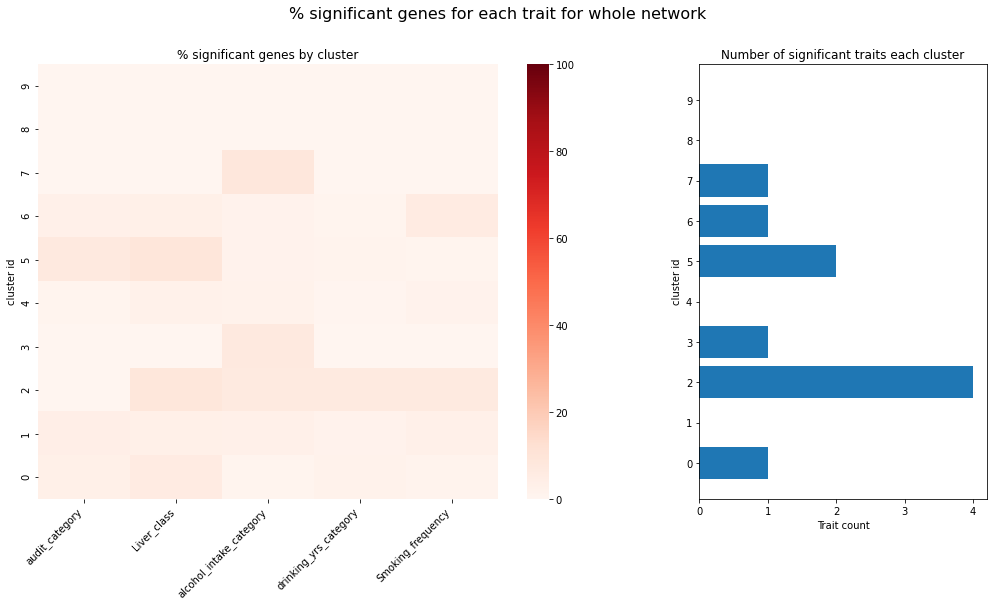

In [175]:
plot_sig_perc(comm_df1, 'louvain_label', 'whole network communities with resolution=1, n_agg=-1')

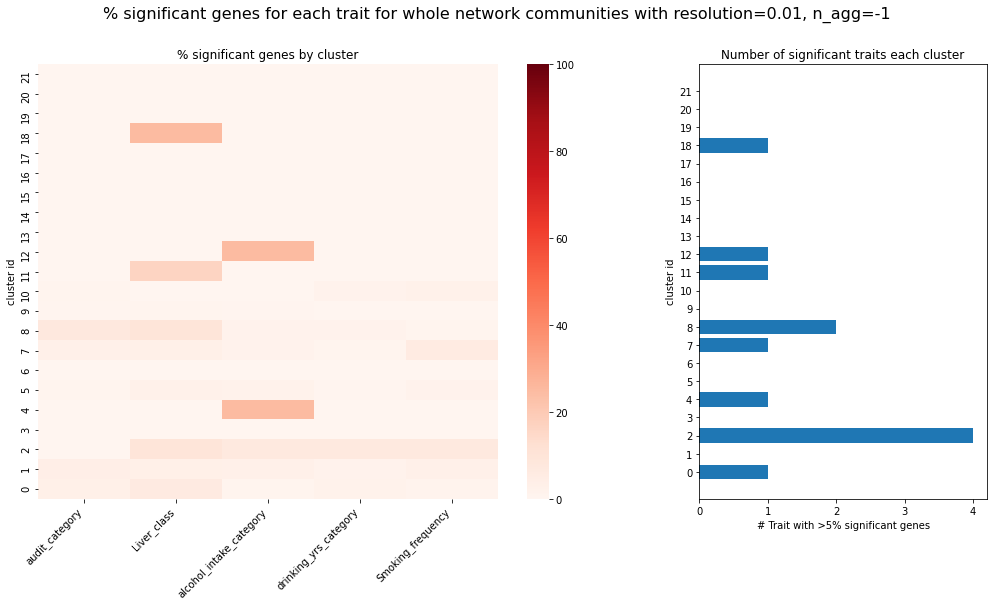

In [234]:
plot_sig_perc(comm_df2, 'louvain_label', 'whole network communities with resolution=0.01, n_agg=-1')

## Evaluation 3: how do trait and community correlation change when community assingment change

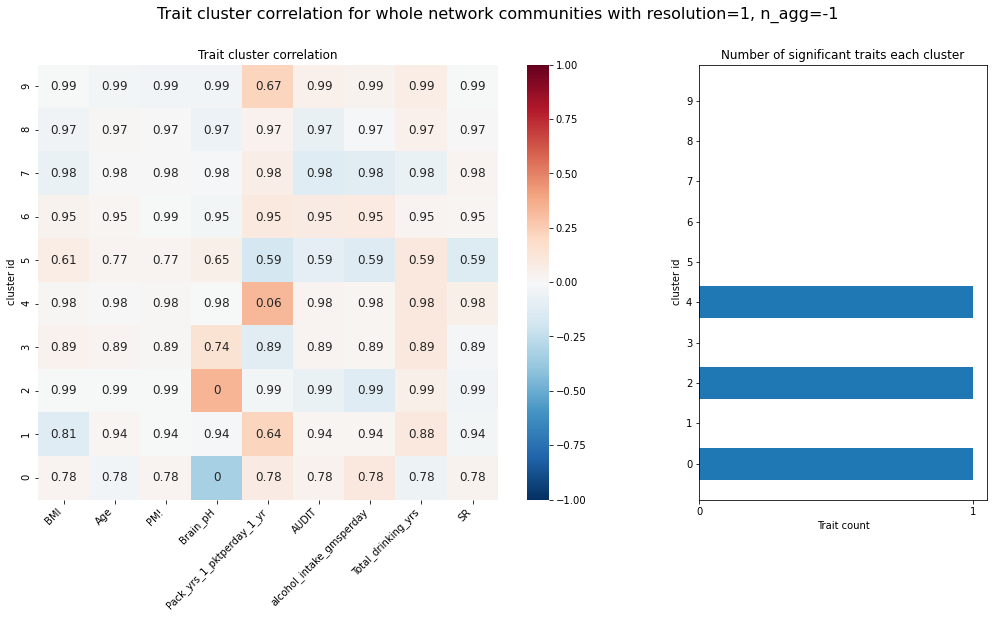

In [235]:
cluster_phenotype_corr(comm_df1, 'louvain_label', 'whole network communities with resolution=1, n_agg=-1')

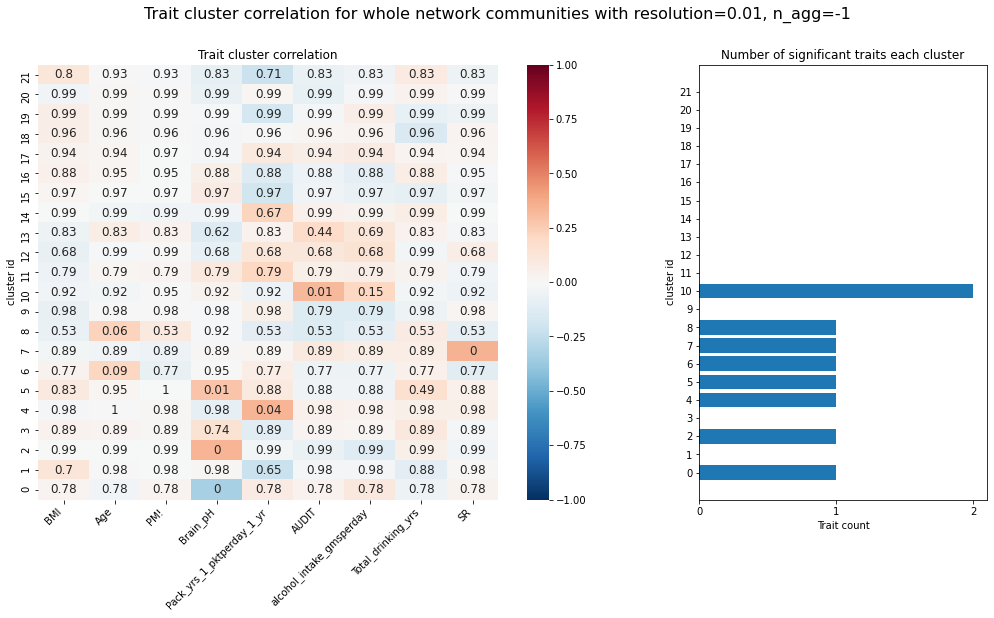

In [236]:
cluster_phenotype_corr(comm_df2, 'louvain_label', 'whole network communities with resolution=0.01, n_agg=-1')

# Evaluate subnetwork quality by comparing to the whole network

In [41]:
tom_df_subset.to_csv(r'G:\Shared drives\NIAAA_ASSIST\Data\tom_subset.csv')

## Evaluation 1: does the scale-free network assumption still hold in the subnetwork?

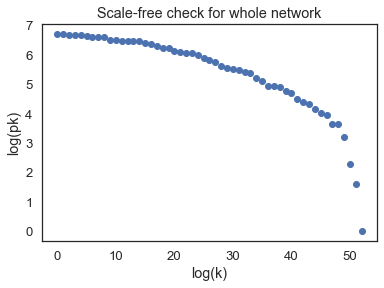

In [263]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

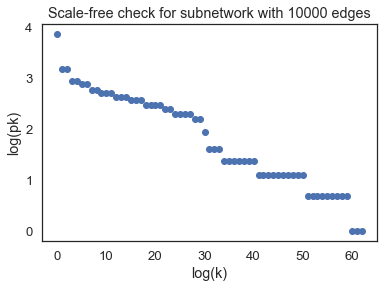

In [ ]:
subset_networks = []
for edge in [10000,5000,1000]:
    subset, G = subset_network(tom_df, 0.21, 0.99, edge)
    subset_networks.append(subset) 
    scale_free_validate(subset, f'subnetwork with {edge} edges')

## Evaluation 2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

In [24]:
subset_networks2 = []
subset_G = []
for weight in [0.218, 0.24, 0.278]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_networks2.append(subset)
    subset_G.append(G)

Number of edges left: 10100.0
Number of edges left: 4967.0
Number of edges left: 1092.0


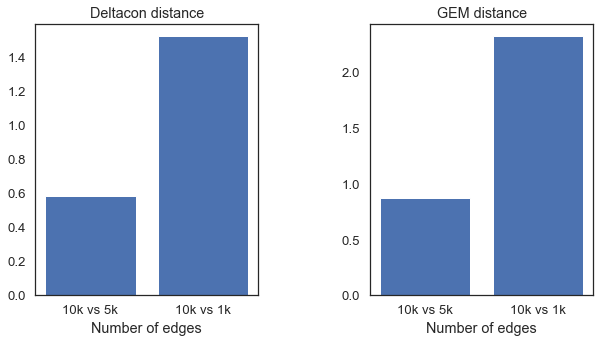

In [370]:
plot_graph_distance(subset_df, ['10k', '5k', '1k'])

## Evaluation 3: compare subnetworks by their communities

### Evaluation 3a: comparison by jaccard

In [243]:
subset_communities = []
for subset in subset_networks:
    subset_communities.append(run_louvain(subset))

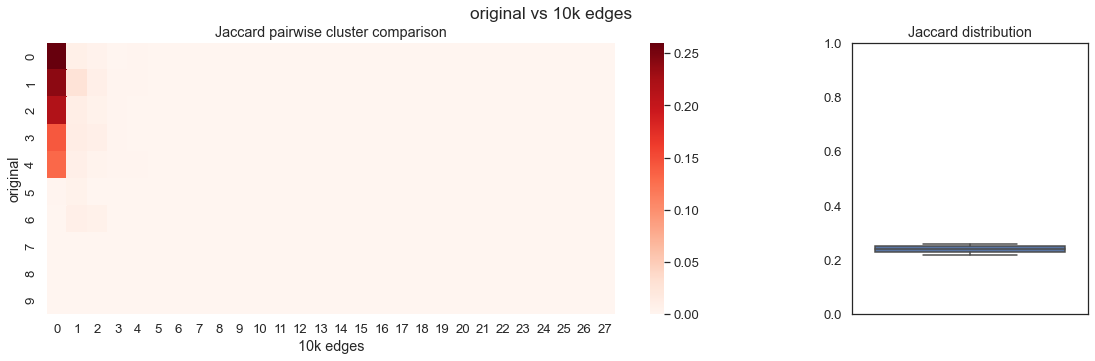

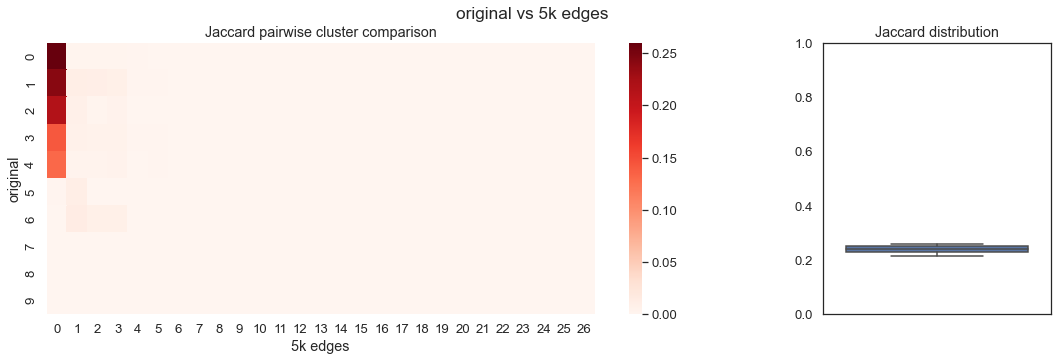

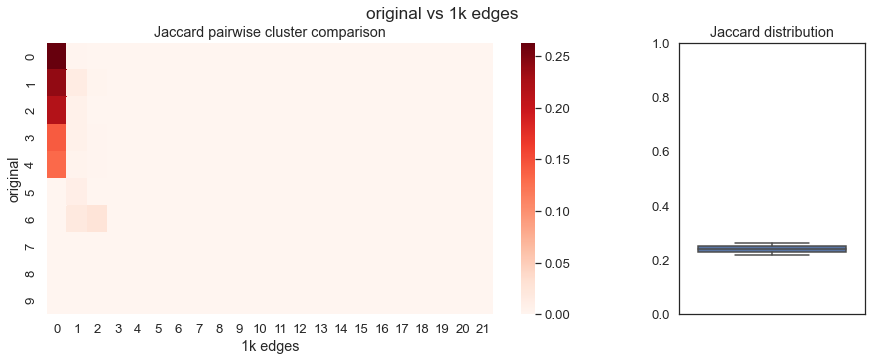

In [246]:
subset_names = ['10k edges', '5k edges', '1k edges']
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = False, top=3)

### Evaluation 3b: comparison by jaccard (nodes with degree = 0 excluded)

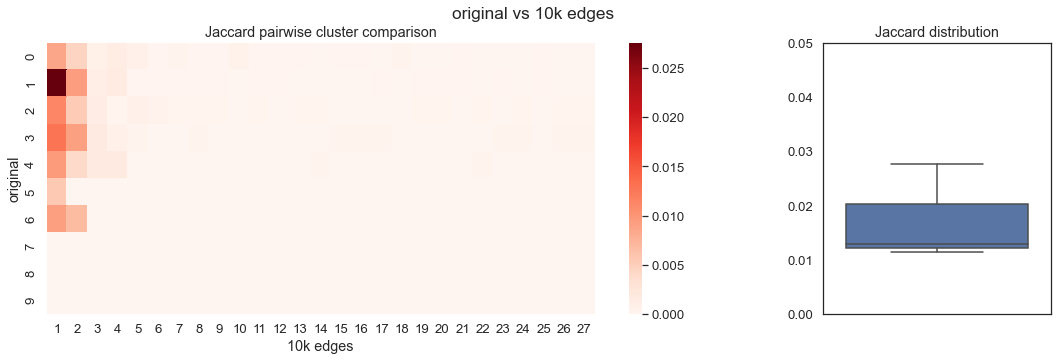

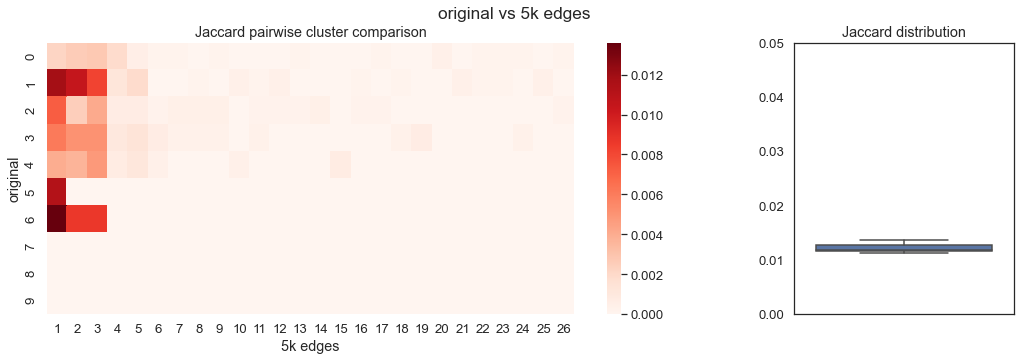

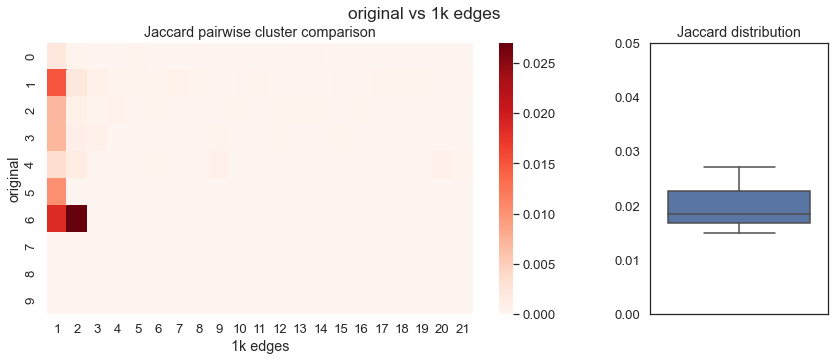

In [248]:
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = True, top=3, y_max = 0.05)

### Evaluation 3c: comparison of subnetwork by normalized mutual information

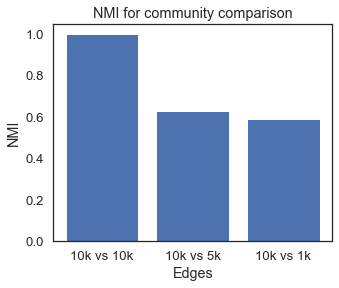

In [249]:
plot_cluster_nmi_comparison(subset_communities[0], subset_communities, 
                            'louvain_label', ['10k vs 10k', '10k vs 5k', '10k vs 1k'])

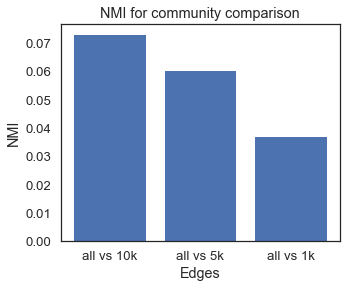

In [250]:
plot_cluster_nmi_comparison(comm_df1, subset_communities, 
                            'louvain_label', ['all vs 10k', 'all vs 5k', 'all vs 1k'])